In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/sentiment/train2.csv',encoding='latin-1')

train_df

text sentiment  Unnamed: 2
0                    I`d have responded, if I were going   neutral         NaN
1          Sooo SAD I will miss you here in San Diego!!!  negative         NaN
2                              my boss is bullying me...  negative         NaN
3                         what interview! leave me alone  negative         NaN
4       Sons of ****, why couldn`t they put them on t...  negative         NaN
...                                                  ...       ...         ...
27476   wish we could come see u on Denver  husband l...  negative         NaN
27477   I`ve wondered about rake to.  The client has ...  negative         NaN
27478   Yay good for both of you. Enjoy the break - y...  positive         NaN
27479                         But it was worth it  ****.  positive         NaN
27480     All this flirting going on - The ATG smiles...   neutral         NaN

[27481 rows x 3 columns]

In [49]:
train_df = train_df[train_df.sentiment != "neutral"] 

In [50]:
train_df

text sentiment  Unnamed: 2
1          Sooo SAD I will miss you here in San Diego!!!  negative         NaN
2                              my boss is bullying me...  negative         NaN
3                         what interview! leave me alone  negative         NaN
4       Sons of ****, why couldn`t they put them on t...  negative         NaN
6      2am feedings for the baby are fun when he is a...  positive         NaN
...                                                  ...       ...         ...
27475                                     enjoy ur night  positive         NaN
27476   wish we could come see u on Denver  husband l...  negative         NaN
27477   I`ve wondered about rake to.  The client has ...  negative         NaN
27478   Yay good for both of you. Enjoy the break - y...  positive         NaN
27479                         But it was worth it  ****.  positive         NaN

[16363 rows x 3 columns]

In [51]:
train_df = train_df[["text","sentiment"]]

In [52]:
train_df['sentiment'] = train_df['sentiment'].replace('negative', 0)
train_df['sentiment'] = train_df['sentiment'].replace('positive', 1)

<ipython-input-52-fa4401ed091a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sentiment'] = train_df['sentiment'].replace('negative', 0)
<ipython-input-52-fa4401ed091a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sentiment'] = train_df['sentiment'].replace('positive', 1)


In [53]:
train_df

text  sentiment
1          Sooo SAD I will miss you here in San Diego!!!          0
2                              my boss is bullying me...          0
3                         what interview! leave me alone          0
4       Sons of ****, why couldn`t they put them on t...          0
6      2am feedings for the baby are fun when he is a...          1
...                                                  ...        ...
27475                                     enjoy ur night          1
27476   wish we could come see u on Denver  husband l...          0
27477   I`ve wondered about rake to.  The client has ...          0
27478   Yay good for both of you. Enjoy the break - y...          1
27479                         But it was worth it  ****.          1

[16363 rows x 2 columns]

**Counting the number of Postive and Negative Sentiments from our CSV file Dataset**

In [9]:
train_df['sentiment'].value_counts()


1    8582
0    7781
Name: sentiment, dtype: int64

**Now we will use glove lib which consists of pre-embdeded words so we dont have to embedded them.**

In [10]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2023-04-26 18:38:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.06MB/s    in 2m 42s  

2023-04-26 18:41:19 (5.07 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip

^C


In [13]:
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r',errors="ignore") as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, '/content/drive/MyDrive/sentiment/glove.6B.50d.txt')
words

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.1

In [14]:
len(words)

400000

In [15]:
import nltk

nltk.download('wordnet ')

[nltk_data] Error loading wordnet : Package 'wordnet ' not found in
[nltk_data]     index


False

In [16]:
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Now we will user tokenizer so we can store our words from a sentence into word format in our array or list.**

In [17]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

tokenizer.tokenize('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

**We will aslo use word lemmatizer which basically does is convert our words **to the most commomly used word format **bold text**
**'foot'  is the most commonly used word instead of feet so it will convert** **the word 'feet' to 'foot' so detection of our word sentiment becomes easier.**

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#lemmatizer.lemmatize('feet')

def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

message_to_token_list('@user feet a fathers is dysfunctional and is')

['user', 'foot', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

**Converting Our words/sentences into vectors so we can train our model and so also we can use tokenizer and lemmatizer on them**

In [19]:
def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

In [20]:
message_to_word_vectors('@user when a father is dysfunctional and is').shape

(8, 50)

In [21]:
train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(11454, 2454, 2455)

In [22]:
test_df

text  sentiment
13908  I wish I knew how to play an instrument. Lesso...          1
13909  UGH I missed the POTUS @ MY Five Guys!!!! 2 bl...          0
13910  Good morning tweeps! I have a feeling I won`t ...          1
13911  #BSNL, Stupid net went down.. Been without ema...          0
13912      Happy Mother`s Day to all the moms out there!          1
...                                                  ...        ...
16358                          Bruno arghhhh i cant wait          0
16359  _Gable It`s good isn`****! Our holiday chalet ...          1
16360  Last week I had 516 hits on my guinea pig pict...          1
16361                Dosen`t Want To Go To Work Tomorrow          0
16362   Ahhh...can`t do this one....will be in las Ve...          0

[2455 rows x 2 columns]

In [23]:
def df_to_X_y(dff):
  y = dff['sentiment'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['text']:
    message_as_vector_seq = message_to_word_vectors(message)
    
    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 50))

    all_word_vector_sequences.append(message_as_vector_seq)
  
  return all_word_vector_sequences, y

**Calculating average word size in a sentence or shape of the array or matrix so we can fix them and dont exceed it.**
**After that we will split our dataset into train and test portions and then design our model and run the training.**

In [24]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

11454 12


In [25]:
print(len(X_train), len(X_train[2]))

11454 12


(array([1046., 1696., 1866., 2133., 1356., 1173., 1366.,  607.,  174.,
          37.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

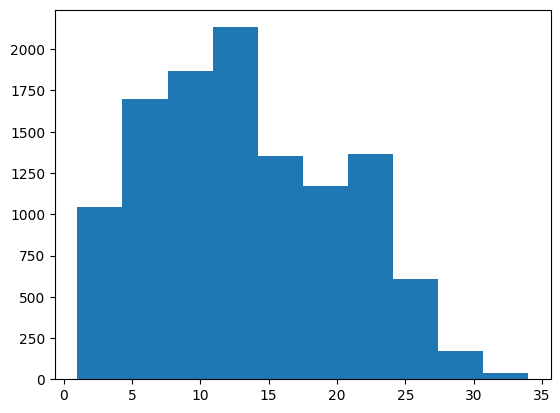

In [26]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [27]:
pd.Series(sequence_lengths).describe()

count    11454.000000
mean        13.371311
std          6.965957
min          1.000000
25%          8.000000
50%         12.000000
75%         19.000000
max         34.000000
dtype: float64

In [28]:
from copy import deepcopy

def pad_X(X, desired_sequence_length=57):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 50))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [29]:
X_train = pad_X(X_train)

X_train.shape

(11454, 57, 50)

In [30]:
y_train.shape

(11454,)

In [31]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((2454, 57, 50), (2454,))

In [32]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((2455, 57, 50), (2455,))

In [33]:
#Our Model using LSTM
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(57, 50)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 57, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 57, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 57, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 57, 64)            0         
                                                                 
 flatten (Flatten)           (None, 3648)              0

In [35]:
#Saving our Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('/content/drive/MyDrive/models/tw.h', save_best_only=True)
#Hyper-parameters of our model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC(name='auc')])

In [38]:
frequencies = pd.value_counts(train_df['sentiment'])

frequencies

1    5971
0    5483
Name: sentiment, dtype: int64

In [39]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

{0: 2.0890023709648005, 1: 1.9182716462904037}

In [40]:
#Fitiing our training our model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)

Epoch 1/20
357/358 [============================>.] - ETA: 0s - loss: 1.1714 - accuracy: 0.6886 - auc: 0.7605

358/358 [==============================] - 29s 49ms/step - loss: 1.1711 - accuracy: 0.6888 - auc: 0.7606 - val_loss: 0.5065 - val_accuracy: 0.7588 - val_auc: 0.8337
Epoch 2/20
356/358 [============================>.] - ETA: 0s - loss: 0.9672 - accuracy: 0.7726 - auc: 0.8481

358/358 [==============================] - 18s 51ms/step - loss: 0.9670 - accuracy: 0.7726 - auc: 0.8481 - val_loss: 0.4877 - val_accuracy: 0.7689 - val_auc: 0.8552
Epoch 3/20
357/358 [============================>.] - ETA: 0s - loss: 0.9201 - accuracy: 0.7823 - auc: 0.8641

358/358 [==============================] - 16s 44ms/step - loss: 0.9198 - accuracy: 0.7824 - auc: 0.8642 - val_loss: 0.4598 - val_accuracy: 0.7852 - val_auc: 0.8684
Epoch 4/20
355/358 [============================>.] - ETA: 0s - loss: 0.8904 - accuracy: 0.7877 - auc: 0.8735

358/358 [==============================] - 16s 45ms/step - loss: 0.8903 - accuracy: 0.7879 - auc: 0.8735 - val_loss: 0.4501 - val_accuracy: 0.7893 - val_auc: 0.8742
Epoch 5/20
354/358 [============================>.] - ETA: 0s - loss: 0.8652 - accuracy: 0.7978 - auc: 0.8810

358/358 [==============================] - 16s 44ms/step - loss: 0.8652 - accuracy: 0.7977 - auc: 0.8809 - val_loss: 0.4358 - val_accuracy: 0.7987 - val_auc: 0.8801
Epoch 6/20
356/358 [============================>.] - ETA: 0s - loss: 0.8463 - accuracy: 0.8051 - auc: 0.8867

358/358 [==============================] - 16s 45ms/step - loss: 0.8453 - accuracy: 0.8056 - auc: 0.8870 - val_loss: 0.4312 - val_accuracy: 0.7999 - val_auc: 0.8840
Epoch 7/20
357/358 [============================>.] - ETA: 0s - loss: 0.8292 - accuracy: 0.8077 - auc: 0.8912

358/358 [==============================] - 18s 49ms/step - loss: 0.8293 - accuracy: 0.8073 - auc: 0.8912 - val_loss: 0.4274 - val_accuracy: 0.8040 - val_auc: 0.8878
Epoch 8/20
358/358 [==============================] - 4s 12ms/step - loss: 0.8083 - accuracy: 0.8170 - auc: 0.8972 - val_loss: 0.4579 - val_accuracy: 0.7759 - val_auc: 0.8902
Epoch 9/20
357/358 [============================>.] - ETA: 0s - loss: 0.8000 - accuracy: 0.8175 - auc: 0.8992

358/358 [==============================] - 16s 46ms/step - loss: 0.7994 - accuracy: 0.8176 - auc: 0.8994 - val_loss: 0.4123 - val_accuracy: 0.8174 - val_auc: 0.8951
Epoch 10/20
358/358 [==============================] - 5s 13ms/step - loss: 0.7782 - accuracy: 0.8285 - auc: 0.9051 - val_loss: 0.4233 - val_accuracy: 0.8064 - val_auc: 0.8964
Epoch 11/20
357/358 [============================>.] - ETA: 0s - loss: 0.7690 - accuracy: 0.8273 - auc: 0.9072

358/358 [==============================] - 16s 44ms/step - loss: 0.7702 - accuracy: 0.8270 - auc: 0.9069 - val_loss: 0.4018 - val_accuracy: 0.8227 - val_auc: 0.9003
Epoch 12/20
358/358 [==============================] - 5s 13ms/step - loss: 0.7534 - accuracy: 0.8349 - auc: 0.9116 - val_loss: 0.4039 - val_accuracy: 0.8187 - val_auc: 0.9016
Epoch 13/20
358/358 [==============================] - 5s 13ms/step - loss: 0.7344 - accuracy: 0.8393 - auc: 0.9158 - val_loss: 0.4193 - val_accuracy: 0.8142 - val_auc: 0.9031
Epoch 14/20
357/358 [============================>.] - ETA: 0s - loss: 0.7167 - accuracy: 0.8438 - auc: 0.9199

358/358 [==============================] - 18s 49ms/step - loss: 0.7167 - accuracy: 0.8437 - auc: 0.9199 - val_loss: 0.3925 - val_accuracy: 0.8268 - val_auc: 0.9053
Epoch 15/20
358/358 [==============================] - 4s 12ms/step - loss: 0.7114 - accuracy: 0.8477 - auc: 0.9210 - val_loss: 0.4215 - val_accuracy: 0.8138 - val_auc: 0.9040
Epoch 16/20
358/358 [==============================] - 5s 13ms/step - loss: 0.7003 - accuracy: 0.8492 - auc: 0.9236 - val_loss: 0.4219 - val_accuracy: 0.8134 - val_auc: 0.9054
Epoch 17/20
357/358 [============================>.] - ETA: 0s - loss: 0.6975 - accuracy: 0.8493 - auc: 0.9242

358/358 [==============================] - 17s 47ms/step - loss: 0.6974 - accuracy: 0.8493 - auc: 0.9243 - val_loss: 0.3859 - val_accuracy: 0.8309 - val_auc: 0.9083
Epoch 18/20
354/358 [============================>.] - ETA: 0s - loss: 0.6787 - accuracy: 0.8542 - auc: 0.9281

358/358 [==============================] - 17s 47ms/step - loss: 0.6792 - accuracy: 0.8541 - auc: 0.9281 - val_loss: 0.3851 - val_accuracy: 0.8313 - val_auc: 0.9103
Epoch 19/20
354/358 [============================>.] - ETA: 0s - loss: 0.6739 - accuracy: 0.8545 - auc: 0.9294

358/358 [==============================] - 15s 43ms/step - loss: 0.6753 - accuracy: 0.8541 - auc: 0.9291 - val_loss: 0.3794 - val_accuracy: 0.8341 - val_auc: 0.9113
Epoch 20/20
357/358 [============================>.] - ETA: 0s - loss: 0.6663 - accuracy: 0.8577 - auc: 0.9311

358/358 [==============================] - 17s 47ms/step - loss: 0.6672 - accuracy: 0.8575 - auc: 0.9309 - val_loss: 0.3784 - val_accuracy: 0.8341 - val_auc: 0.9116


**Loading our model for prediction of our tweets.**

In [41]:
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/MyDrive/models/tw.h')

**Finding out loss and accuracy of our model.**

In [42]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

77/77 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1154
           1       0.86      0.83      0.84      1301

    accuracy                           0.84      2455
   macro avg       0.84      0.84      0.84      2455
weighted avg       0.84      0.84      0.84      2455



**Give our model an example to predict the output.**

In [44]:
a='Hello,very good brother '
b=message_to_token_list(a)
print(b)
c=message_to_word_vectors(a, word_dict=words)
print(c)
l=1
#y = d.to_numpy().astype(int)

all_word_vector_sequences = []

if c.shape[0] == 0:
  c = np.zeros(shape=(1, 50))
  
all_word_vector_sequences.append(c)

d=pad_X(all_word_vector_sequences, desired_sequence_length=57)

print(best_model.predict(d)) 

t_predictions = (best_model.predict(d) > 0.5).astype(int)


print('The Sentiment of this tweet is: ',t_predictions)

['hello', 'very', 'good', 'brother']
[[-3.8497e-01  8.0092e-01  6.4106e-02 -2.8355e-01 -2.6759e-02 -3.4532e-01
  -6.4253e-01 -1.1729e-01 -3.3257e-01  5.5243e-01 -8.7813e-02  9.0350e-01
   4.7102e-01  5.6657e-01  6.9850e-01 -3.5229e-01 -8.6542e-01  9.0573e-01
   3.5760e-02 -7.1705e-02 -1.2327e-01  5.4923e-01  4.7005e-01  3.5572e-01
   1.2611e+00 -6.7581e-01 -9.4983e-01  6.8666e-01  3.8710e-01 -1.3492e+00
   6.3512e-01  4.6416e-01 -4.8814e-01  8.3827e-01 -9.2460e-01 -3.3722e-01
   5.3741e-01 -1.0616e+00 -8.1403e-02 -6.7111e-01  3.0923e-01 -3.9230e-01
  -5.5002e-01 -6.8827e-01  5.8049e-01 -1.1626e-01  1.3139e-02 -5.7654e-01
   4.8833e-02  6.7204e-01]
 [ 5.7049e-01 -7.7854e-03 -7.0766e-01 -3.1785e-01  8.9493e-01 -1.6128e-02
  -6.7149e-02  1.5765e-01 -4.9832e-01  2.5845e-01  1.0943e-01  3.6728e-01
  -1.4843e-01  6.3286e-02  2.0832e-01  4.5920e-01  7.1781e-01  2.2772e-01
  -1.5349e-03 -9.3093e-01 -8.0048e-01  4.6714e-01  4.1571e-01  1.7572e-01
   1.0876e+00 -1.6116e+00 -7.0943e-01  8.3772e-0